# Multipoint ICMEs plots

May 2024 events for Weiler et al. 2024 paper

environment helio4 see heliocats/envs

PLASTIC data files description
https://stereo-ssc.nascom.nasa.gov/data/ins_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/READ_ME_PLASTIC_Protons_1DMax_v11.pdf

---

**MIT LICENSE**

Copyright 2024, Christian Moestl

Permission is hereby granted, free of charge, to any person obtaining a copy of this 
software and associated documentation files (the "Software"), to deal in the Software
without restriction, including without limitation the rights to use, copy, modify, 
merge, publish, distribute, sublicense, and/or sell copies of the Software, and to 
permit persons to whom the Software is furnished to do so, subject to the following 
conditions:

The above copyright notice and this permission notice shall be included in all copies 
or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, 
INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A
PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT 
HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF 
CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE 
OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.





In [1]:
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
import seaborn as sns
import numpy as np
import scipy.io
from scipy import stats
import sys
from datetime import datetime
from datetime import timedelta
import time
import pickle
import os
import copy
import urllib
import json
import warnings
import importlib


import sunpy
import sunpy.time
from sunpy.time import parse_time


import astropy
import astropy.constants as const

#our own packages

data_path='/Users/chris/python/data/may_2024_events/'

plt.rcParams["figure.figsize"] = (15,8)
plt.close('all')

#constants: 
#solar radius
Rs_in_AU=float(const.R_sun/const.au)
#define AU in km
AU_in_km=const.au.value/1e3


print('sunpy:',sunpy.__version__)
print('astropy:',astropy.__version__)

print('done')

sunpy: 4.1.2
astropy: 5.3.1
done


In [2]:
print('load data') 


filenoaa="noaa_rtsw_last_35files_now.p" 
[noaa,hnoaa]=pickle.load(open(data_path+filenoaa, "rb" ) )  


filenoaa="noaa_dst_last_35files_now.p" 
dst=pickle.load(open(data_path+filenoaa, "rb" ) )  



filesta='stereoa_beacon_gsm_last_35days_now.p'
[sta,hsta]=pickle.load(open(data_path+filesta, "rb" ) )  



filesta='sta_plastic_may2024.p'
sp=pickle.load(open(data_path+filesta, "rb" ) )  


print('done')
    

load data
done


density MO mean and standard dev: 7.967640918580376 4.979563335367397
density sheath mean and standard dev: 14.96986301369863 9.395421282578296
mean overall: 11.468751966139504


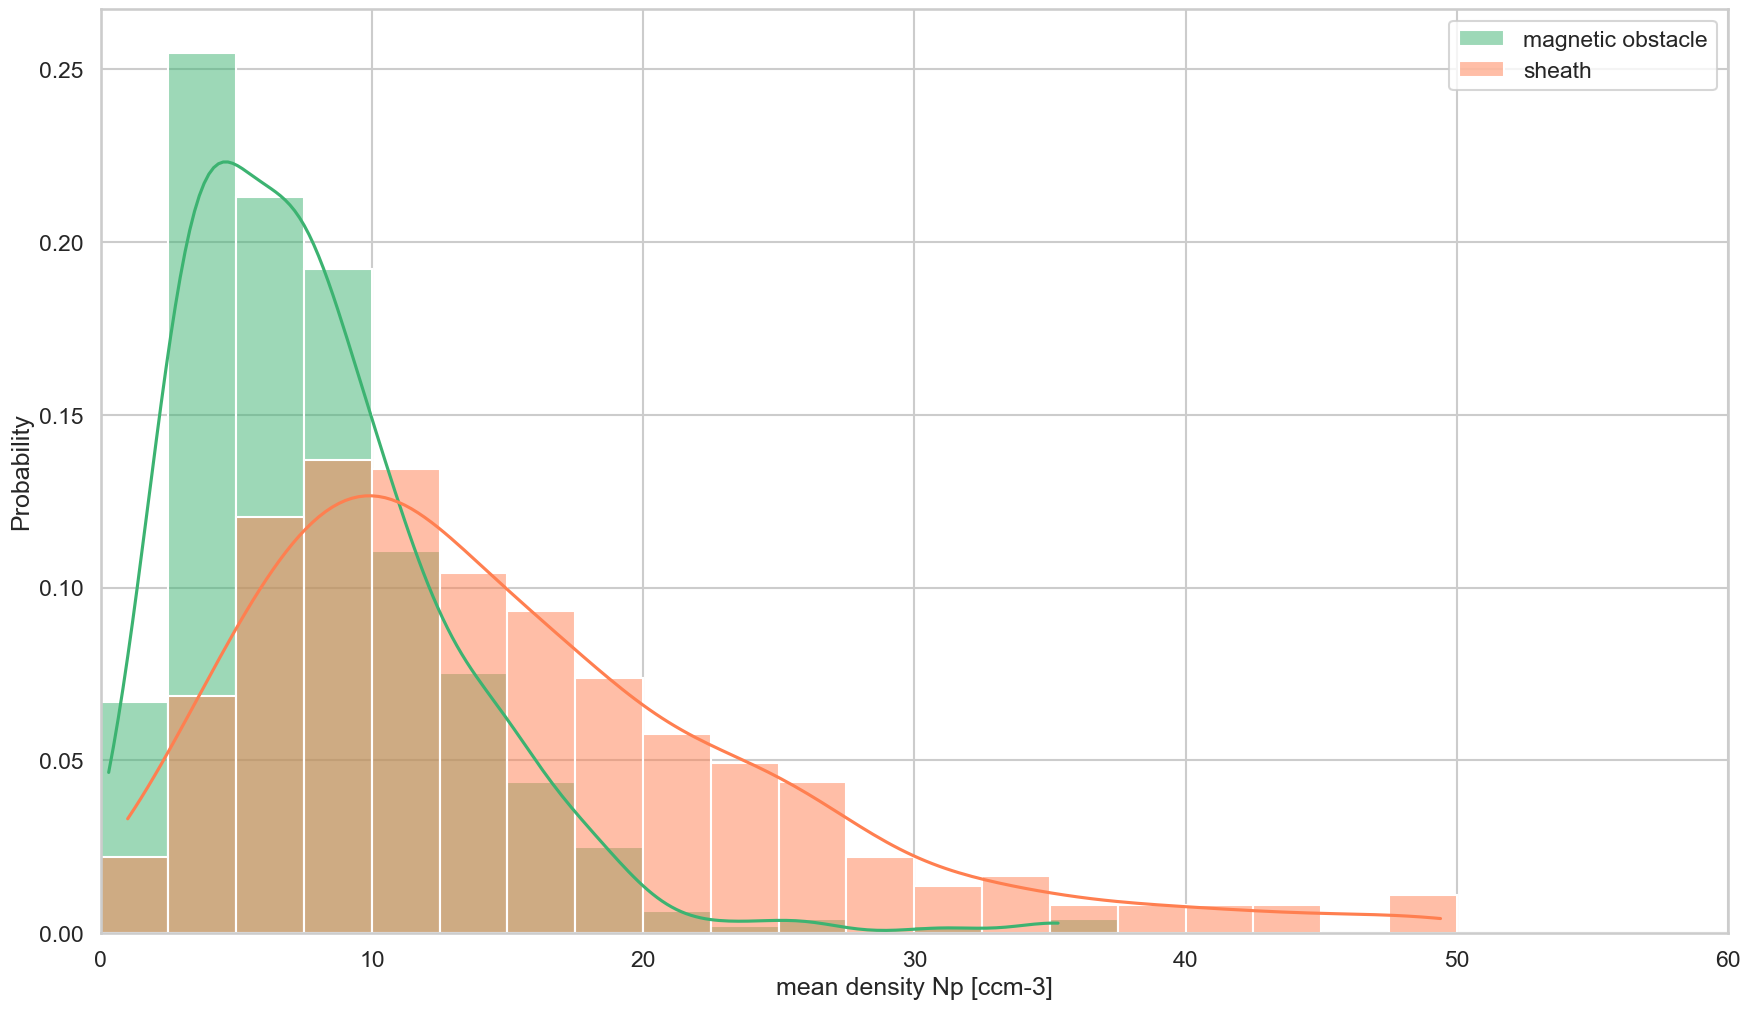

In [3]:
##average density from ICMECAT

#load icmecat as pandas dataframe
file='../icmecat/HELIO4CAST_ICMECAT_v22_pandas.p'
[ic_pandas,h,p]=pickle.load( open(file, 'rb'))   

ic=ic_pandas

#get indices for each target

iwin=np.where(ic.sc_insitu=='Wind')[0]


sns.set_context("talk")     
sns.set_style('whitegrid')
fig=plt.figure(20,figsize=(21,12),dpi=100)


i1au=iwin

#print(ic.keys())

print('density MO mean and standard dev:', np.nanmean(ic.mo_density_mean[i1au]), np.nanstd(ic.mo_density_mean[i1au]))
print('density sheath mean and standard dev:', np.nanmean(ic.sheath_density_mean[i1au]), np.nanstd(ic.sheath_density_mean[i1au]))

print('mean overall:', (np.nanmean(ic.mo_density_mean[i1au])/2+np.nanmean(ic.sheath_density_mean[i1au]/2) ))


ax2=plt.subplot(111)
sns.histplot(ic.mo_density_mean[i1au], label='magnetic obstacle',color='mediumseagreen',kde=True, bins=np.arange(0,100,2.5), stat='probability')
sns.histplot(ic.sheath_density_mean[i1au], label='sheath',color='coral',alpha=0.5,kde=True, bins=np.arange(0,100,2.5),stat='probability')
plt.legend(loc=1)
ax2.set_xlabel('mean density Np [ccm-3]')
ax2.set_xlim(0,60)
plt.show()




## EVENT 2024 May 8-12

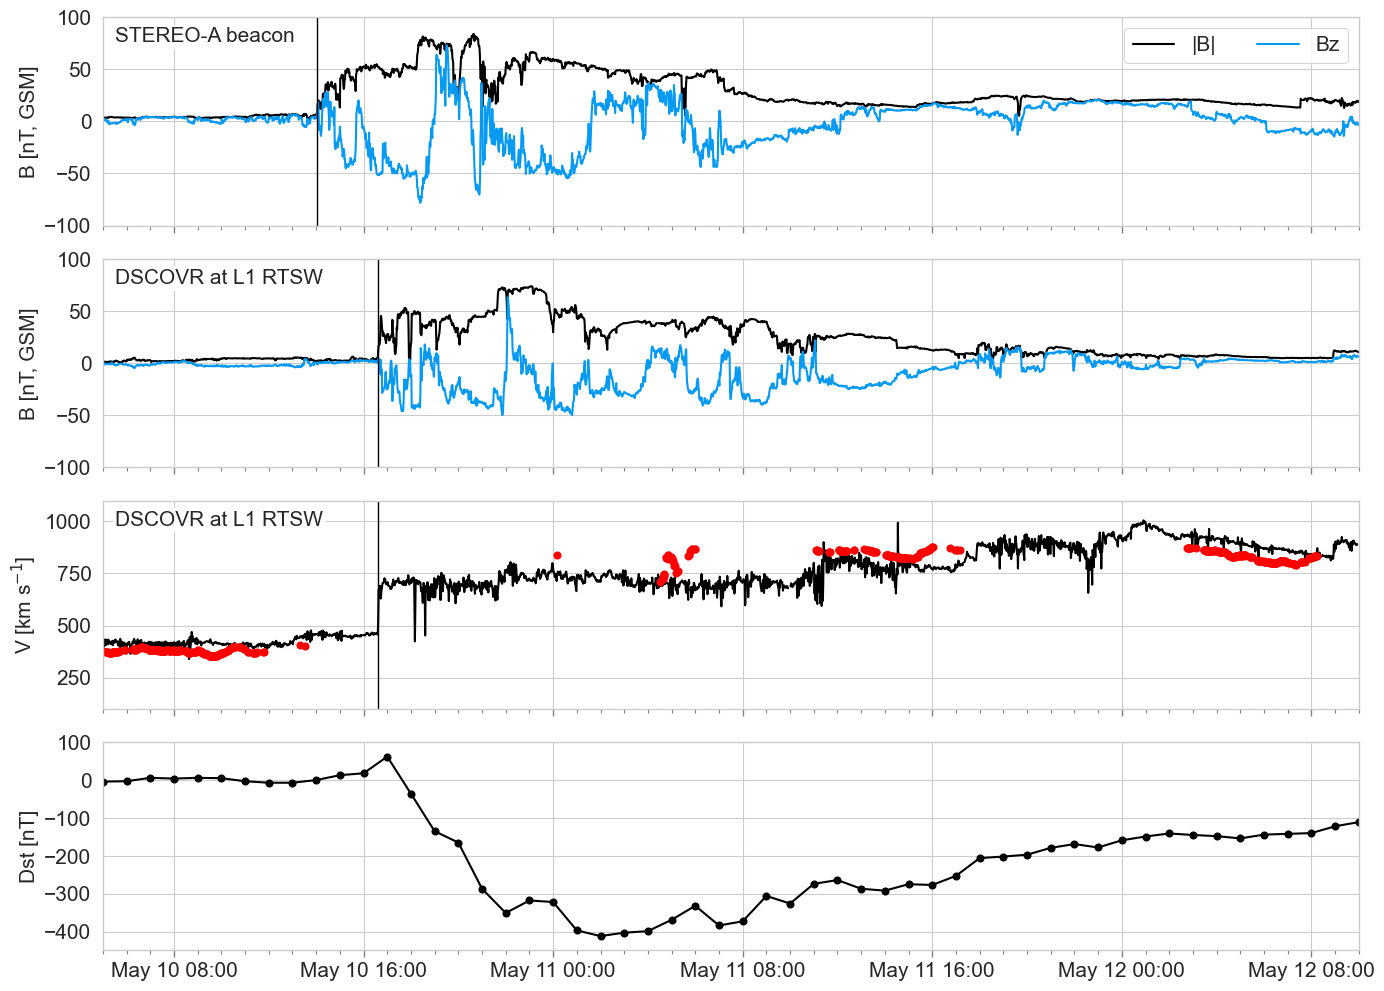

In [4]:
sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(1,figsize=(14, 10),dpi=100)

#define subplot grid
ax1 = plt.subplot2grid((4, 1), (1, 0))  
ax2 = plt.subplot2grid((4, 1), (0, 0))  
ax3 = plt.subplot2grid((4, 1), (2, 0))  
ax4 = plt.subplot2grid((4, 1), (3, 0))  


#plotstart=datetime.datetime(2021,10,11)
#plotend=datetime.datetime(2021,10,13,6)

plotstart=datetime(2024,5,10,5)
plotend=datetime(2024,5,12,10)


blim=30
linewi=1.5
days_dist=1/3


#DSCOVR
ax1.plot(noaa.time, noaa.bt, "k-", lw=linewi,label='|B|')
#ax1.plot(noaa.time, noaa.bx, "-", color="xkcd:magenta", lw=linewi, label='Bx')
#ax1.plot(noaa.time, noaa.by, "-", color="xkcd:orange", lw=linewi,label='By')
ax1.plot(noaa.time, noaa.bz, "-", color="xkcd:azure", lw=linewi,label='Bz')



#ax1.plot(win.time, win.bt, "k-", lw=linewi,label='Btotal')
#ax1.plot(win.time, win.bx, "r-", color="xkcd:magenta", lw=linewi, label='Bx')
#ax1.plot(win.time, win.by, "g-", color="xkcd:orange", lw=linewi,label='By')
#ax1.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=linewi,label='Bz')

ax1.set_ylabel('B [nT, GSM]',fontsize=15)
ax1.set_xlim(plotstart,plotend)
#ax1.set_ylim(-blim,blim)
#ax1.legend(loc=3,ncol=4,fontsize=12)
ax1.grid(True)
ax1.tick_params(axis='y', labelsize=15)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d ') )
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(axis='x', labelsize=12)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d') )
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(which='both', bottom=True, color='gray')
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax1.set_xticklabels([])


#ax11.plot(noaa.time, noaa.vt, color="black",linewidth=1,label='Vp Wind')
#ax11.set_ylabel('V [km $\mathrm{s^{-1}}$]',fontsize=15)
#ax11.set_xlim(plotstart,plotend)
#ax11.set_ylim(300,610)
#ax11.tick_params(axis='y', labelsize=15)
#ax11.grid(True)
#ax11.tick_params(axis='x', labelsize=12)
#ax11.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d ') )
#ax11.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))

#ax11.set_xticklabels([])



### STEREO-A
#blim=25

ax2.plot(sta.time, sta.bt, "k-", lw=linewi,label='|B|')
#ax2.plot(sta.time, sta.bx, "-", color="xkcd:magenta", lw=linewi, label='Bx')
#ax2.plot(sta.time, sta.by, "-", color="xkcd:orange", lw=linewi,label='By')
ax2.plot(sta.time, sta.bz, "-", color="xkcd:azure", lw=linewi,label='Bz')

ax2.legend(loc=1,ncol=4,fontsize=15)
ax2.set_ylabel('B [nT, GSM]',fontsize=15)
ax2.set_xlim(plotstart,plotend)
ax2.set_ylim(-blim,blim)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=15)
ax2.grid(True)

ax2.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%B %d %H:00') )
ax2.tick_params(which='both', bottom=True, color='gray')
ax2.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax2.set_xticklabels([])


ax3.plot(noaa.time, noaa.vt, "k-", lw=linewi,label='V')
ax3.plot(sp.time, sp.vt, "or-", lw=linewi,label='V STEREO-A')

ax3.set_ylabel('V [km s$^{-1}$]',fontsize=15)
ax3.set_xlim(plotstart,plotend)
ax3.set_ylim(100,1100)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax3.grid(True)
ax3.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%B %d %H:00') )
ax3.tick_params(which='both', bottom=True, color='gray')
ax3.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax3.set_xticklabels([])


ax4.plot(dst.time, dst.dst, "o-k", lw=linewi,label='Dst')
ax4.set_ylabel('Dst [nT]',fontsize=15)
ax4.set_xlim(plotstart,plotend)
ax4.set_ylim(-450,100)
ax4.tick_params(axis='x', labelsize=15)
ax4.tick_params(axis='y', labelsize=15)
#ax2.legend(loc=1,ncol=4,fontsize=15)
ax4.grid(True)
ax4.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax4.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%B %d %H:00') )
ax4.tick_params(which='both', bottom=True, color='gray')
ax4.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax4.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))




dsc_is=parse_time('2024-05-10T16:37Z').datetime

#dsc_ms=parse_time('2024-03-24T18:21Z').datetime
#dsc_me=parse_time('2024-03-25T10:01Z').datetime



ax1.plot_date([dsc_is,dsc_is],[-500,500],'-k',linewidth=1)            

ax1.set_ylim(-100,100)

ax3.axvline(dsc_is,linewidth=1,color='black')  


sta_is=parse_time('2024-05-10T14:03Z').datetime


#sta_ms=parse_time('2024-03-24T19:32Z').datetime
#sta_me=parse_time('2024-03-26T06:31Z').datetime

ax2.plot_date([sta_is,sta_is],[-500,500],'-k',linewidth=1)            
ax2.set_ylim(-100,100)

ax1.annotate('DSCOVR at L1 RTSW',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('STEREO-A beacon',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax3.annotate('DSCOVR at L1 RTSW',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))




plt.tight_layout()


plt.savefig('../results/may_2024_lineup/bz_bt_v_2024_may.jpg')
plt.savefig('../results/may_2024_lineup/bz_bt_v_2024_may.png')
plt.savefig('../results/may_2024_lineup/bz_bt_v_2024_may.pdf')

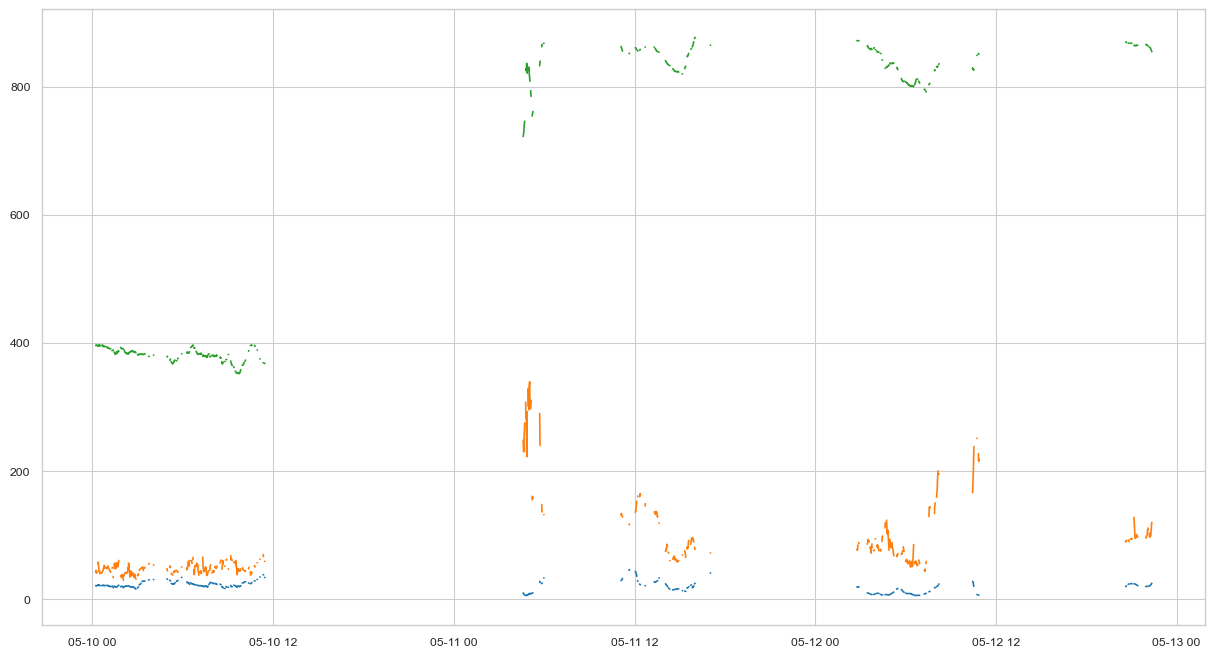

In [5]:
plt.plot(sp.time,sp.np)
#plt.plot(noaa.time,noaa.np)

plt.plot(sp.time,sp.tp/1e3)
plt.plot(sp.time,sp.vt)
#plt.plot(noaa.time,noaa.vt)

#sp

In [6]:
#positions at shock arrival time


print()
print('STEREO-A position')
sta_is_index=np.where(sta.time == sta_is)[0][0]
print(sta.r[sta_is_index], ' AU')
print(sta.lon[sta_is_index], ' deg longitude HEEQ')
print(sta.lat[sta_is_index], ' deg latitude HEEQ')


print()
print('DSCOVR position')

noaa_is_index=np.where(noaa.time == dsc_is)[0][0]
print(noaa.r[noaa_is_index], ' AU')
print(noaa.lon[noaa_is_index], ' deg longitude HEEQ')
print(noaa.lat[noaa_is_index], ' deg latitude HEEQ')


STEREO-A position
0.956486781578134  AU
12.553502306504882  deg longitude HEEQ
-1.5701177695533637  deg latitude HEEQ

DSCOVR position
1.0003709921052348  AU
-0.013441068280954984  deg longitude HEEQ
-3.072640863343401  deg latitude HEEQ


- L1 DSCOVR real time data:

shock 2024-05-10T16:37Z

ICME start, MO start and MO end

CME 1 2024-05-10T16:37Z & 2024-05-10T19:10Z & 2024-05-10T22:04Z


CME 2
2024-05-10T21:39Z & 2024-05-10T22:05Z & 2024-05-11T01:20Z


CME 3 (side hit?)
2024-05-11T00:02Z & 2024-05-11T02:18Z & 2024-05-11T07:27Z


CME 4 
2024-05-11T07:34Z & 2024-05-11T07:55Z & 2024-05-11T09:30Z


CME 5
2024-05-11T10:41Z & 2024-05-11T11:06Z & 2024-05-11T14:31Z




- STEREO-A beacon data

shock 2024-05-10T14:03Z

ICME start, MO start and MO end


CME 1 


2024-05-10T14:03Z & 2024-05-10T15:41Z & 2024-05-10T19:48Z


CME 2

2024-05-10T18:14Z & 2024-05-10T20:03 & 2024-05-10T20:56Z


CME 3

2024-05-10T21:41Z & 2024-05-10T22:42Z & 2024-05-11T03:45Z 


CME 4
2024-05-11T05:36Z & 2024-05-11T07:13Z & 2024-05-11T13:46Z 



In [7]:


dsc_is1=parse_time('2024-05-10T16:37Z').datetime
dsc_mo1=parse_time('2024-05-10T19:10Z').datetime
dsc_me1=parse_time('2024-05-10T22:04Z').datetime


dsc_is2=parse_time('2024-05-10T21:39Z').datetime
dsc_mo2=parse_time('2024-05-10T22:05Z').datetime
dsc_me2=parse_time('2024-05-11T01:20Z').datetime



dsc_is3=parse_time('2024-05-11T00:02Z').datetime
dsc_mo3=parse_time('2024-05-11T02:18Z').datetime
dsc_me3=parse_time('2024-05-11T05:35Z').datetime


dsc_is4=parse_time('2024-05-11T05:36Z').datetime 
dsc_mo4=parse_time('2024-05-11T06:06Z').datetime
dsc_me4=parse_time('2024-05-11T07:20Z').datetime


dsc_is5=parse_time('2024-05-11T07:37Z').datetime 
dsc_mo5=parse_time('2024-05-11T07:55Z').datetime
dsc_me5=parse_time('2024-05-11T09:30Z').datetime


dsc_is6=parse_time('2024-05-11T10:41Z').datetime
dsc_mo6=parse_time('2024-05-11T11:06Z').datetime
dsc_me6=parse_time('2024-05-11T14:31Z').datetime



#old

#dsc_is3=parse_time('2024-05-11T00:02Z').datetime
#dsc_mo3=parse_time('2024-05-11T02:18Z').datetime
#dsc_me3=parse_time('2024-05-11T07:27Z').datetime

#dsc_is4=parse_time('2024-05-11T05:55Z').datetime 
#dsc_mo4=parse_time('2024-05-11T07:55Z').datetime
#dsc_me4=parse_time('2024-05-11T09:30Z').datetime




#STEREO-A

sta_is1=parse_time('2024-05-10T14:03Z').datetime
sta_mo1=parse_time('2024-05-10T15:41Z').datetime
sta_me1=parse_time('2024-05-10T19:48Z').datetime

sta_is2=parse_time('2024-05-10T18:14Z').datetime
sta_mo2=parse_time('2024-05-10T20:03').datetime
sta_me2=parse_time('2024-05-10T20:56Z').datetime

sta_is3=parse_time('2024-05-10T21:41Z').datetime
sta_mo3=parse_time('2024-05-10T22:42Z').datetime
sta_me3=parse_time('2024-05-11T03:45Z').datetime

sta_is4=parse_time('2024-05-11T05:36Z').datetime
sta_mo4=parse_time('2024-05-11T07:13Z').datetime
sta_me4=parse_time('2024-05-11T13:46Z').datetime



###  Figure with B, V, temperature, density for identification

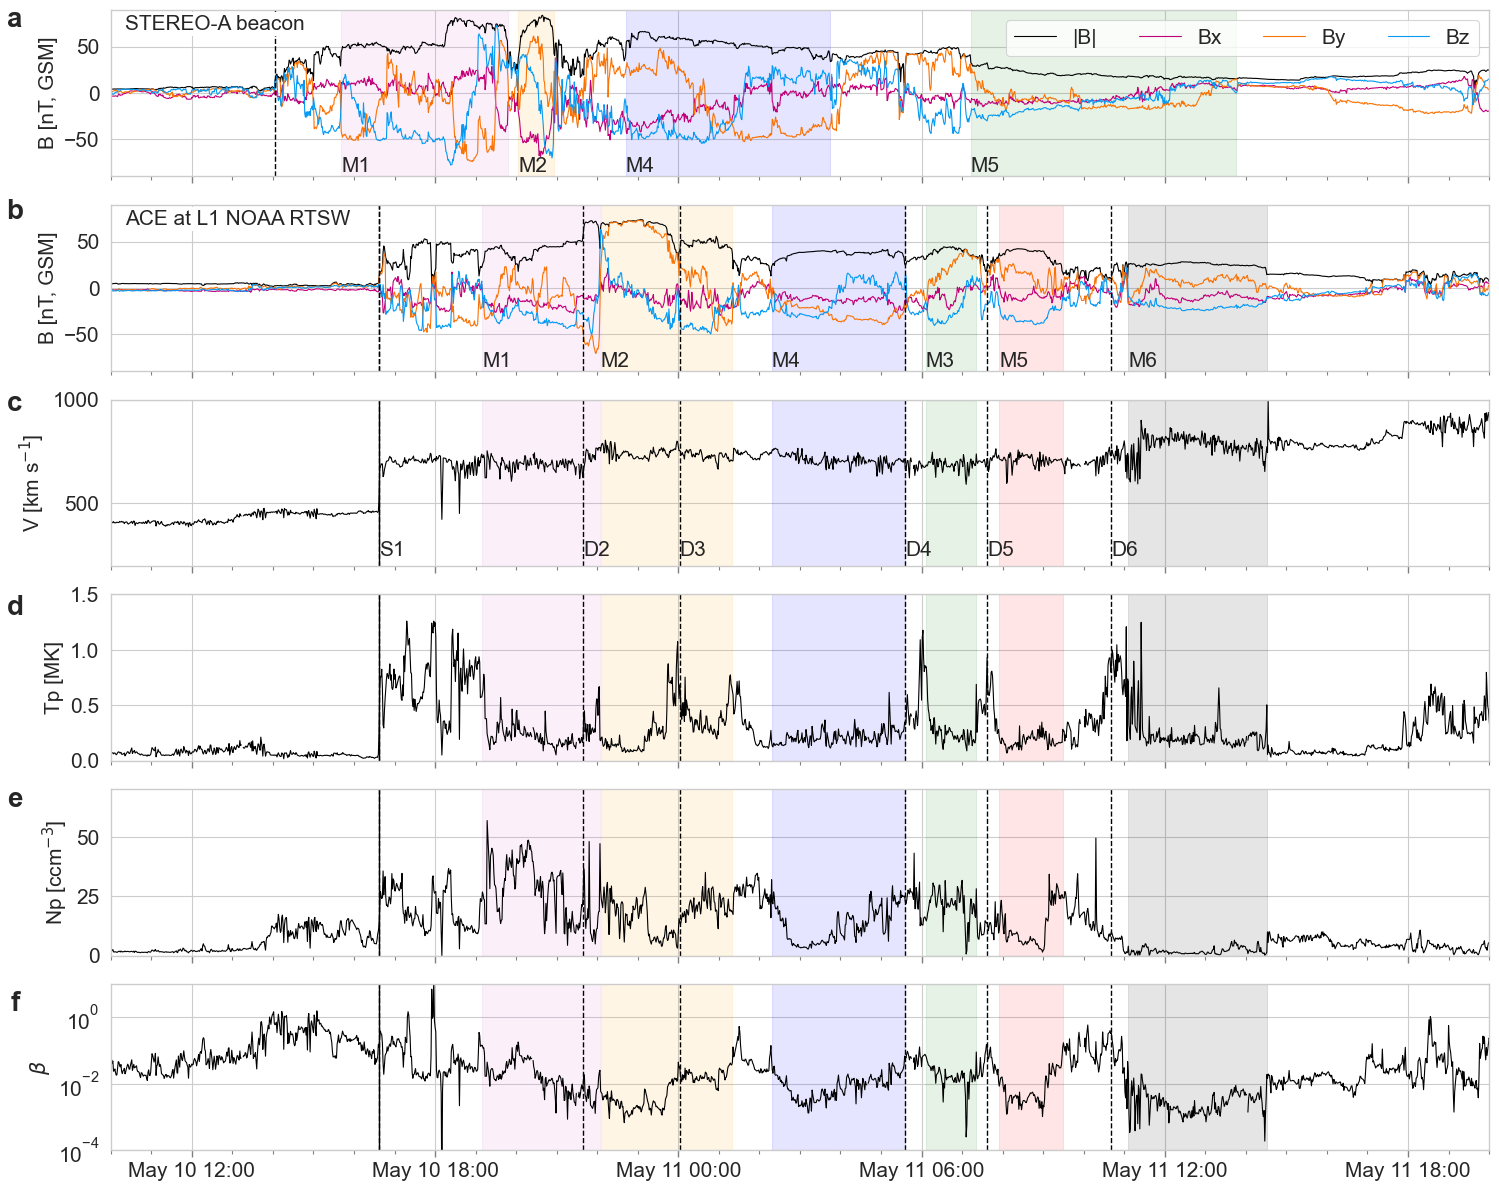

In [19]:
sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(2,figsize=(15, 12),dpi=100)

#define subplot grid
ax0 = plt.subplot2grid((6, 1), (0, 0))  
ax1 = plt.subplot2grid((6, 1), (1, 0))  
ax2 = plt.subplot2grid((6, 1), (2, 0))  
ax3 = plt.subplot2grid((6, 1), (3, 0))  
ax4 = plt.subplot2grid((6, 1), (4, 0))  
ax5 = plt.subplot2grid((6, 1), (5, 0))  


#plotstart=datetime.datetime(2021,10,11)
#plotend=datetime.datetime(2021,10,13,6)


blim=90
linewi=0.8
days_dist=1


plotstart=datetime(2024,5,10,10)
plotend=datetime(2024,5,11,20)



ax0.plot(sta.time, sta.bt, "k-", lw=linewi,label='|B|')
ax0.plot(sta.time, sta.bx, "-", color="xkcd:magenta", lw=linewi, label='Bx')
ax0.plot(sta.time, sta.by, "-", color="xkcd:orange", lw=linewi,label='By')
ax0.plot(sta.time, sta.bz, "-", color="xkcd:azure", lw=linewi,label='Bz')

ax0.legend(loc=1,ncol=4,fontsize=15)
ax0.set_ylabel('B [nT, GSM]',fontsize=15)
ax0.set_xlim(plotstart,plotend)
ax0.set_ylim(-blim,blim)
ax0.tick_params(axis='x', labelsize=15)
ax0.tick_params(axis='y', labelsize=15)
ax0.grid(True)
#ax0.set_xticklabels([])
#ax0.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d') )
#ax0.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax0.tick_params(which='both', bottom=True, color='gray')
ax0.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax0.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1/4))
ax0.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%B %d %H:00') )
ax0.set_xticklabels([])

#DSCOVR
ax1.plot(noaa.time, noaa.bt, "k-", lw=linewi,label='Btotal')
ax1.plot(noaa.time, noaa.bx, "-", color="xkcd:magenta", lw=linewi, label='Br')
ax1.plot(noaa.time, noaa.by, "-", color="xkcd:orange", lw=linewi,label='Bt')
ax1.plot(noaa.time, noaa.bz, "-", color="xkcd:azure", lw=linewi,label='Bn')

ax1.set_ylabel('B [nT, GSM]',fontsize=15)
ax1.set_xlim(plotstart,plotend)
ax1.set_ylim(-blim,blim)
#ax1.legend(loc=3,ncol=4,fontsize=12)
ax1.grid(True)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)
#ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y %b %d ') )
#ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(days_dist))
ax1.tick_params(which='both', bottom=True, color='gray')
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1/4))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%B %d %H:00') )
ax1.set_xticklabels([])




#speed
ax2.plot(noaa.time, noaa.vt, "k-", lw=linewi,label='Vt DSCOVR')
#ax2.plot(sp.time, sp.vt, "r-", lw=linewi,label='Vt STEREO-A')
ax2.set_xlim(plotstart,plotend)
ax2.set_ylabel('V [km s$^{-1}$]',fontsize=15)
ax2.set_ylim(200,1000)
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(which='both', bottom=True, color='gray')
ax2.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax2.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1/4))
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%B %d %H:00') )
ax2.set_xticklabels([])



#temperature
ax3.plot(noaa.time, noaa.tp/1e6, "k-", lw=linewi,label='Tp DSCOVR')
#ax2.plot(sp.time, sp.tp/1e6, "or-", lw=linewi,label='TP STEREO-A')
ax3.set_xlim(plotstart,plotend)
ax3.set_ylabel('Tp [MK]',fontsize=15)
ax3.set_ylim(0,1.5)
ax3.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='y', labelsize=15)
ax3.tick_params(which='both', bottom=True, color='gray')
ax3.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax3.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1/4))
ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%B %d %H:00') )
ax3.set_xticklabels([])


## density
ax4.plot(noaa.time, noaa.np, "k-", lw=linewi,label='Btotal DSCOVR')
#ax3.plot(sp.time, sp.np, "or-", lw=linewi,label='Btotal STEREO-A')
ax4.set_xlim(plotstart,plotend)
ax4.set_ylabel('Np [ccm$^{-3}$]',fontsize=15)
ax4.set_ylim(0,70)
ax4.tick_params(axis='x', labelsize=15)
ax4.tick_params(axis='y', labelsize=15)
ax4.tick_params(which='both', bottom=True, color='gray')
ax4.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax4.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1/4))
ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%B %d %H:00') )
ax4.set_xticklabels([])



#beta

beta = (noaa.np * 1e-6 * 1.38e-23 * noaa.tp) / (noaa.bt * 1e-9)** 2 / (2*1.3e-6)

ax5.plot(noaa.time, beta, "k-", lw=linewi,label='$beta$ DSCOVR')
ax5.set_xlim(plotstart,plotend)
ax5.set_ylabel(r'$\beta$',fontsize=15)

ax5.set_ylim(0.0001,10)
ax5.tick_params(axis='x', labelsize=15)
ax5.tick_params(axis='y', labelsize=15)
ax5.tick_params(which='both', bottom=True, color='gray')
ax5.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax5.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1/4))
ax5.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%B %d %H:00') )

ax5.set_yscale('log')





m1c='#DA70D6'
m2c='orange'
m3c='blue'
m4c='green'
m5c='red'
m6c='black'


#STEREO-A CMEs

#ax0.axvline(sta_mo1,linewidth=1,color='black', linestyle='--')  
#ax0.axvline(sta_me1,linewidth=1,color='black', linestyle='--')  

ax0.axvspan(sta_mo1, sta_me1, color=m1c, alpha=0.1, label='CME1')



#ax1.axvline(dsc_is2,linewidth=1,color='blue', linestyle='--')  
#ax0.axvline(sta_mo2,linewidth=1,color='blue', linestyle='--')  
#ax0.axvline(sta_me2,linewidth=1,color='blue', linestyle='--')  

ax0.axvspan(sta_mo2, sta_me2, color=m2c, alpha=0.1, label='CME2')


#ax1.axvline(dsc_is3,linewidth=1,color='red', linestyle='--')  
#ax0.axvline(sta_mo3,linewidth=1,color='red', linestyle='--')  
#ax0.axvline(sta_me3,linewidth=1,color='red', linestyle='--')  

ax0.axvspan(sta_mo3, sta_me3, color=m3c, alpha=0.1, label='CME3')


#ax1.axvline(dsc_is4,linewidth=1,color='brown', linestyle='--')  
#ax0.axvline(sta_mo4,linewidth=1,color='orange', linestyle='--')  
#ax0.axvline(sta_me4,linewidth=1,color='orange', linestyle='--')  

ax0.axvspan(sta_mo4, sta_me4, color=m4c, alpha=0.1, label='CME4')



#DSCOVR CMEs

#ax1.axvline(dsc_mo1,linewidth=1,color='black', linestyle='--')  
#ax1.axvline(dsc_me1,linewidth=1,color='black', linestyle='--')  

ax1.axvspan(dsc_mo1, dsc_me1, color=m1c, alpha=0.1, label='CME1')
ax1.axvspan(dsc_mo2, dsc_me2, color=m2c, alpha=0.1, label='CME2')
ax1.axvspan(dsc_mo3, dsc_me3, color=m3c, alpha=0.1, label='CME3')
ax1.axvspan(dsc_mo4, dsc_me4, color=m4c, alpha=0.1, label='CME4')
ax1.axvspan(dsc_mo5, dsc_me5, color=m5c, alpha=0.1, label='CME5')
ax1.axvspan(dsc_mo6, dsc_me6, color=m6c, alpha=0.1, label='CME6')


#ax1.axvline(dsc_is2,linewidth=1,color='blue', linestyle='--')  
#ax1.axvline(dsc_mo2,linewidth=1,color='blue', linestyle='--')  
#ax1.axvline(dsc_me2,linewidth=1,color='blue', linestyle='--')  

#ax1.axvline(dsc_is3,linewidth=1,color='red', linestyle='--')  
#ax1.axvline(dsc_mo3,linewidth=1,color='red', linestyle='--')  
#ax1.axvline(dsc_me3,linewidth=1,color='red', linestyle='--')  

#ax1.axvline(dsc_is4,linewidth=1,color='brown', linestyle='--')  
#ax1.axvline(dsc_mo4,linewidth=1,color='orange', linestyle='--')  
#ax1.axvline(dsc_me4,linewidth=1,color='orange', linestyle='--')  

#ax1.axvline(dsc_is5,linewidth=1,color='green', linestyle='--')  
#ax1.axvline(dsc_mo5,linewidth=1,color='green', linestyle='--')  
#ax1.axvline(dsc_me5,linewidth=1,color='green', linestyle='--')  

ax2.axvline(dsc_is1,linewidth=1,color='black', linestyle='-')  
ax2.axvspan(dsc_mo1, dsc_me1, color=m1c, alpha=0.1, label='CME1')
ax2.axvspan(dsc_mo2, dsc_me2, color=m2c, alpha=0.1, label='CME2')
ax2.axvspan(dsc_mo3, dsc_me3, color=m3c, alpha=0.1, label='CME3')
ax2.axvspan(dsc_mo4, dsc_me4, color=m4c, alpha=0.1, label='CME4')
ax2.axvspan(dsc_mo5, dsc_me5, color=m5c, alpha=0.1, label='CME5')
ax2.axvspan(dsc_mo6, dsc_me6, color=m6c, alpha=0.1, label='CME6')


ax3.axvline(dsc_is1,linewidth=1,color='black', linestyle='-')  
ax3.axvspan(dsc_mo1, dsc_me1, color=m1c, alpha=0.1, label='CME1')
ax3.axvspan(dsc_mo2, dsc_me2, color=m2c, alpha=0.1, label='CME2')
ax3.axvspan(dsc_mo3, dsc_me3, color=m3c, alpha=0.1, label='CME3')
ax3.axvspan(dsc_mo4, dsc_me4, color=m4c, alpha=0.1, label='CME4')
ax3.axvspan(dsc_mo5, dsc_me5, color=m5c, alpha=0.1, label='CME5')
ax3.axvspan(dsc_mo6, dsc_me6, color=m6c, alpha=0.1, label='CME6')


ax4.axvline(dsc_is1,linewidth=1,color='black', linestyle='-')  
ax4.axvspan(dsc_mo1, dsc_me1, color=m1c, alpha=0.1, label='CME1')
ax4.axvspan(dsc_mo2, dsc_me2, color=m2c, alpha=0.1, label='CME2')
ax4.axvspan(dsc_mo3, dsc_me3, color=m3c, alpha=0.1, label='CME3')
ax4.axvspan(dsc_mo4, dsc_me4, color=m4c, alpha=0.1, label='CME4')
ax4.axvspan(dsc_mo5, dsc_me5, color=m5c, alpha=0.1, label='CME5')
ax4.axvspan(dsc_mo6, dsc_me6, color=m6c, alpha=0.1, label='CME6')

ax5.axvline(dsc_is1,linewidth=1,color='black', linestyle='-')  
ax5.axvspan(dsc_mo1, dsc_me1, color=m1c, alpha=0.1, label='CME1')
ax5.axvspan(dsc_mo2, dsc_me2, color=m2c, alpha=0.1, label='CME2')
ax5.axvspan(dsc_mo3, dsc_me3, color=m3c, alpha=0.1, label='CME3')
ax5.axvspan(dsc_mo4, dsc_me4, color=m4c, alpha=0.1, label='CME4')
ax5.axvspan(dsc_mo5, dsc_me5, color=m5c, alpha=0.1, label='CME5')
ax5.axvspan(dsc_mo6, dsc_me6, color=m6c, alpha=0.1, label='CME6')



########## ICME start times


ax0.axvline(sta_is1,linewidth=1,color='black', linestyle='--')  
ax1.axvline(dsc_is1,linewidth=1,color='black', linestyle='--')  



##ICME start times

ax1.axvline(dsc_is1,linewidth=1,color='black', linestyle='--')  
ax1.axvline(dsc_is2,linewidth=1,color='black', linestyle='--')  
ax1.axvline(dsc_is3,linewidth=1,color='black', linestyle='--')  
ax1.axvline(dsc_is4,linewidth=1,color='black', linestyle='--')  
ax1.axvline(dsc_is5,linewidth=1,color='black', linestyle='--')  
ax1.axvline(dsc_is6,linewidth=1,color='black', linestyle='--')  

ax2.axvline(dsc_is1,linewidth=1,color='black', linestyle='--')  
ax2.axvline(dsc_is2,linewidth=1,color='black', linestyle='--')  
ax2.axvline(dsc_is3,linewidth=1,color='black', linestyle='--')  
ax2.axvline(dsc_is4,linewidth=1,color='black', linestyle='--')  
ax2.axvline(dsc_is5,linewidth=1,color='black', linestyle='--')  
ax2.axvline(dsc_is6,linewidth=1,color='black', linestyle='--')  


ax3.axvline(dsc_is1,linewidth=1,color='black', linestyle='--')  
ax3.axvline(dsc_is2,linewidth=1,color='black', linestyle='--')  
ax3.axvline(dsc_is3,linewidth=1,color='black', linestyle='--')  
ax3.axvline(dsc_is4,linewidth=1,color='black', linestyle='--')  
ax3.axvline(dsc_is5,linewidth=1,color='black', linestyle='--')  
ax3.axvline(dsc_is6,linewidth=1,color='black', linestyle='--')  

ax4.axvline(dsc_is1,linewidth=1,color='black', linestyle='--')  
ax4.axvline(dsc_is2,linewidth=1,color='black', linestyle='--')  
ax4.axvline(dsc_is3,linewidth=1,color='black', linestyle='--')  
ax4.axvline(dsc_is4,linewidth=1,color='black', linestyle='--')  
ax4.axvline(dsc_is5,linewidth=1,color='black', linestyle='--')  
ax4.axvline(dsc_is6,linewidth=1,color='black', linestyle='--')  

ax5.axvline(dsc_is1,linewidth=1,color='black', linestyle='--')  
ax5.axvline(dsc_is2,linewidth=1,color='black', linestyle='--')  
ax5.axvline(dsc_is3,linewidth=1,color='black', linestyle='--')  
ax5.axvline(dsc_is4,linewidth=1,color='black', linestyle='--')  
ax5.axvline(dsc_is5,linewidth=1,color='black', linestyle='--')  
ax5.axvline(dsc_is6,linewidth=1,color='black', linestyle='--')  


ax0.annotate('STEREO-A beacon',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax1.annotate('ACE at L1 NOAA RTSW',(0.01,0.88),xycoords='axes fraction',fontsize=15,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))

#features annotation

scale_s=250
ax2.annotate('S1',(dsc_is1,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('D2',(dsc_is2,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('D3',(dsc_is3,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('D4',(dsc_is4,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('D5',(dsc_is5,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax2.annotate('D6',(dsc_is6,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))


scale_s=-85
ax1.annotate('M1',(dsc_mo1,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax1.annotate('M2',(dsc_mo2,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax1.annotate('M4',(dsc_mo3,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax1.annotate('M3',(dsc_mo4,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax1.annotate('M5',(dsc_mo5,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax1.annotate('M6',(dsc_mo6,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))


scale_s=-85
ax0.annotate('M1',(sta_mo1,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax0.annotate('M2',(sta_mo2,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax0.annotate('M4',(sta_mo3,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
ax0.annotate('M5',(sta_mo4,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))
#ax0.annotate('M5',(dsc_mo5,scale_s),xycoords='data',fontsize=15)#,bbox=dict(facecolor='white', edgecolor='None', pad=2.0))


plt.tight_layout()

plt.annotate('a',xy=(0.01,0.97),xycoords='figure fraction',fontsize=20,ha='center',weight='bold')
plt.annotate('b',xy=(0.01,0.81),xycoords='figure fraction',fontsize=20,ha='center',weight='bold')
plt.annotate('c',xy=(0.01,0.65),xycoords='figure fraction',fontsize=20,ha='center',weight='bold')
plt.annotate('d',xy=(0.01,0.48),xycoords='figure fraction',fontsize=20,ha='center',weight='bold')
plt.annotate('e',xy=(0.01,0.32),xycoords='figure fraction',fontsize=20,ha='center',weight='bold')
plt.annotate('f',xy=(0.01,0.15),xycoords='figure fraction',fontsize=20,ha='center',weight='bold')


plt.savefig('../results/may_2024_lineup/icme_identify_may_2024.jpg')
plt.savefig('../results/may_2024_lineup/icme_identify_may_2024.png')
plt.savefig('../results/may_2024_lineup/icme_identify_may_2024.pdf')


In [9]:
#DSCOVR cutout ICME interval

startind=np.argmin(abs(dsc_is1-noaa.time))
endind=np.argmin(abs(dsc_mo5-noaa.time))
nc=noaa[startind:endind]


#cutout STA interval

startind=np.argmin(abs(sta_is1-sta.time))
endind=np.argmin(abs(sta_mo4-sta.time))
sc=sta[startind:endind]



print('max Bt NOAA and STA')
print(np.max(np.round(nc.bt,1)))
print(np.max(np.round(sc.bt,1)))


print('min Bz NOAA and STA')
print(np.min(np.round(nc.bz,1)))
print(np.min(np.round(sc.bz,1)))

print()

print('Max speed up to last MO end')
print(np.nanmax(np.round(nc.vt,1)))



max Bt NOAA and STA
73.8
84.0
min Bz NOAA and STA
-50.1
-78.0

Max speed up to last MO end
804.7


In [10]:
####### compare data to entire Wind mission

####### or to NOAA RTSW archive


data_path2='/Users/chris/python/data/insitu_python/'

#filewin="wind_1995_now_rtn.p" 
#[win,hwin]=pickle.load(open(data_path2+filewin, "rb" ) )  


filearc='noaa_archive_gsm.p'
[arc,harc]=pickle.load(open(data_path2+filearc, "rb" ) )  



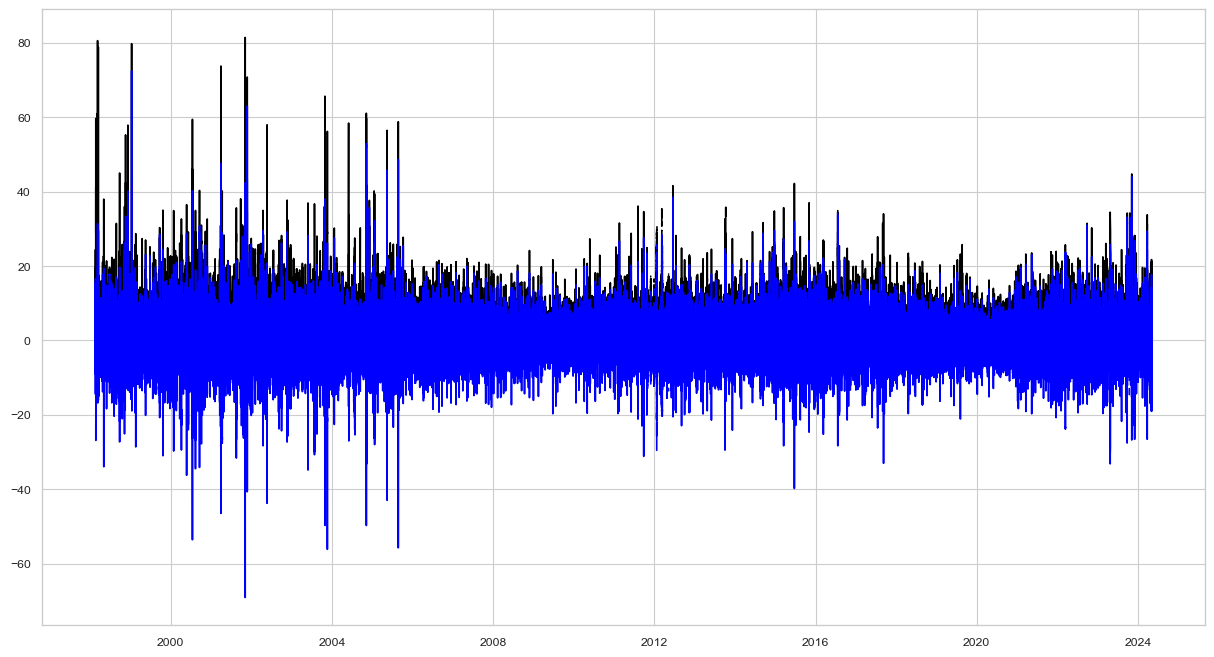

In [11]:
plt.plot(arc.time,arc.bt,'-k')
plt.plot(arc.time,arc.bz,'-b')
#arc.time[0:10]
